<a href="https://colab.research.google.com/github/viniciusrpb/cic0087_natural_language_processing/blob/main/cap03_1_perceptron_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 3 - Redes Neurais Artificiais

Neste notebook Python, apresentamos os princípios básicos de Redes Neurais Artificiais. Especificamente, uma rede neural do tipo Perceptron Simples será implementada do zero.

Para isso, vamos utilizar a biblioteca numpy:

In [19]:
import numpy as np

Para propósitos de formalismo, assumiremos que:

O conjunto de dados composto por $N$ instâncias de dados (por exemplo, documentos de textos, conjunto de tweets etc) é definido por:
 

*   $\mathbf{X} = \{\mathbf{x_1}, \mathbf{x_2}, \ldots, \mathbf{x_N}\}$
*   Cada instância $\mathbf{x_i}$ é descrita por $d$ atributos, na seguinte forma: $\mathbf{x_i} = [x_{i,1},x_{i,2},\ldots,x_{i,d}]$


## 3.1. Rede Neural Perceptron "Simples"

Matematicamente, uma rede do tipo perceptron simples é definida por:

- um conjunto de pesos $\{ w_1, ... , w_d\}$;
- uma função de ativação $activation$;
- implementação da função de transferência;
- um valor (ou vetor) para o bias (viés);
- implementação do algoritmo backpropagation.

Primeiramente, vamos criar uma função de ativação. Na nossa implementação, é possível selecionar dois tipos: degrau e sinal. A função recebe os seguintes parâmetros:

*   Um valor $v$ de entrada;
*   O limiar $t$ para a função do tipo "degrau";
*   O tipo da função: "degrau" e "sinal"

In [20]:
def activation(v,t,tipo):
  if tipo == "degrau":
    if v >= t:
      return 1
    else:
      return 0
  elif tipo == "sinal":
    if v >= 0.0:
      return 1
    else:
      return -1

Agora vamos simular o processamento desse neurônio. Vamos criar uma instância artificial $x$, definir um vetor de pesos $w$, a classe (label) da instância ($x$). O pesos do vetor e os valores dos atributos das instâncias foram definidos aleatoriamente -- poderiam ser quaisquer outros valores!


In [21]:
x = [1.0, 0.2, 0.1, 0.7, 0.2]
label = -1
w = [0.2,0.1,0.4,0.6,0.9]
bias = 0.1


Implementamos a função de transferência utilizando um produto escalar simples:

In [22]:
input = np.array(x)
weights = np.array(w)

net = np.dot(input,weights) + bias

net

0.96

Pegando-se o valor resultante da função de transferência como entrada da função de ativação, podemos obter o resultado da classe da entrada $x$.


In [23]:
threshold = 0.5

y = activation(net,threshold,"sinal")

y

1

Observe que, nesse exemplo, a rede perceptron errou a classe da instância $x$, que é da classe "-1", mas a rede erroneamente a classificou como sendo do label "1".

Bom, podemos fazer com que a rede perceptron "aprenda com seu erro" ao atualizar o valor dos pesos. Visando um acerto nessa classificação em uma futura execução desse perceptron, precisamos ensinar à rede os padrões dessa instância. Para esse propósito, pegamos a instância $x$ e utilizamos os valores de seus atributos para atualizar os valores dos pesos como é apresentado a seguir:

In [24]:
novos_pesos = []

for i, a in enumerate(x):
  novos_pesos.append(weights[i] + (label - y)*a)

weights = np.array(novos_pesos)

In [25]:
weights

array([-1.8, -0.3,  0.2, -0.8,  0.5])

Outra possibilidade seria alterar o $threshold$ utilizado ou iniciar os pesos de uma outra maneira. Mas pelo menos, a rede aprendeu com o erro, pois se calcularmos a função de transferência desse neurônio novamente, vemos que houve um acerto: 

In [26]:
net = np.dot(input,weights) + bias

net

threshold = 0.5

y = activation(net,threshold,"sinal")

y

-1

Agora vamos generalizar esse processo de predições da rede neural perceptron utilizando um conjunto de dados com várias instâncias. Seja o seguinte conjunto de dados relacionados com a Tabela OR e seus respectivos labels:

In [27]:
X = [[0,0],[0,1],[1,0],[1,1]]

labels = [0,1,1,1]

Vamos inicilizar os pesos de maneira aleatória:

In [28]:
weights = np.random.random(2)/1000

bias = np.random.random()/1000

Processando cada instância nos leva a obter o seguinte código fonte:

In [29]:
for id,exemplo in enumerate(X):

  input = np.array(exemplo)

  net = np.dot(input,weights) + bias

  y = activation(net,threshold,"degrau")

  print("predicted: {}".format(y))
  print("label: {}".format(labels[id]))

predicted: 0
label: 0
predicted: 0
label: 1
predicted: 0
label: 1
predicted: 0
label: 1


### Backpropagation



O treinamento de uma rede perceptron é realizado pelo algoritmo Backpropagation. Basicamente, trata-se de um processo de minimização de uma função erro $E$ elaborada em relação às comparações entre as predições realizadas pela rede e os labels das instâncias de dados.

\begin{equation}
E = \sum_{i=1}^N [ y_i - label(\mathbf{x_{i}})]^2
\end{equation}

Aqui vamos generalizar o processo. Inicialmente, devemos iniciar a variável $k$ que vai contabilizar a quantidade de épocas. Uma época é uma iteração gasta para processar todas as instâncias de dados, até mesmo quando estão consideradas em subconjuntos -- termo comumente conhecido como $batch$. No caso abaixo, cada subconjunto de instâncias é composto por uma única instância:


In [30]:
k = 1

weights = np.random.random(2)/1000

bias = np.random.random()/1000



Vamos agora desenvolver o código que implementa o processo de gradiente descendente relacionado ao algoritmo backpropagation:

\begin{equation}
w_j^{t+1} = w_j^t + \eta x_{i,j} ( label(\mathbf{x_i}) - y_i )
\end{equation}

em que $\eta$ é a taxa de aprendizado, importante hiperparâmetro que balanceia o valor que será atualizado nos pesos da rede.

ATENÇÃO: valores de hiperparâmetros devem ser ajustados manualmente pelo especialista ou por meio de algoritmos de busca exaustiva (por exemplo, randomizedSearch, keras tuner etc)

Para propósito de simplicidade, vamos definir os valores dos hiperparâmetros:

In [31]:
# learning rate
lr = 0.1

# quantidade máxima de iterações
T = 20


O algoritmo backpropagation é implementado como:

In [32]:
#para cada época
while k < T:

  erro = 0

  for id,exemplo in enumerate(X):
    
    input = np.array(exemplo)

    net = np.dot(input,weights) + bias

    y = activation(net,threshold,"degrau")

    if y != labels[id]:
      erro+=1

    novos_pesos = []

    for i, x in enumerate(exemplo):
      novos_pesos.append(weights[i] + lr*(labels[id] - y)*x)

    bias = bias + (labels[id] - y)

    weights = np.array(novos_pesos)

  print("epoca: {} erros: {}".format(k,erro))

  k+=1

epoca: 1 erros: 1
epoca: 2 erros: 2
epoca: 3 erros: 2
epoca: 4 erros: 2
epoca: 5 erros: 2
epoca: 6 erros: 2
epoca: 7 erros: 2
epoca: 8 erros: 2
epoca: 9 erros: 2
epoca: 10 erros: 2
epoca: 11 erros: 1
epoca: 12 erros: 0
epoca: 13 erros: 0
epoca: 14 erros: 0
epoca: 15 erros: 0
epoca: 16 erros: 0
epoca: 17 erros: 0
epoca: 18 erros: 0
epoca: 19 erros: 0


Lembre-se que você deve ajustar os seguintes hiperparâmetros:

- Taxa de aprendizado;
- Critério de parada do backpropagation (limitando a quantidade de épocas ou fazendo um testes - se o erro da rede não alterar entre duas épocas)

Lembrem-se que temos muitos tipos de redes neurais artificias e nessa disciplina abordaremos a rede neural Multilayer Perceptron e as Redes Neurais Recorrentes.

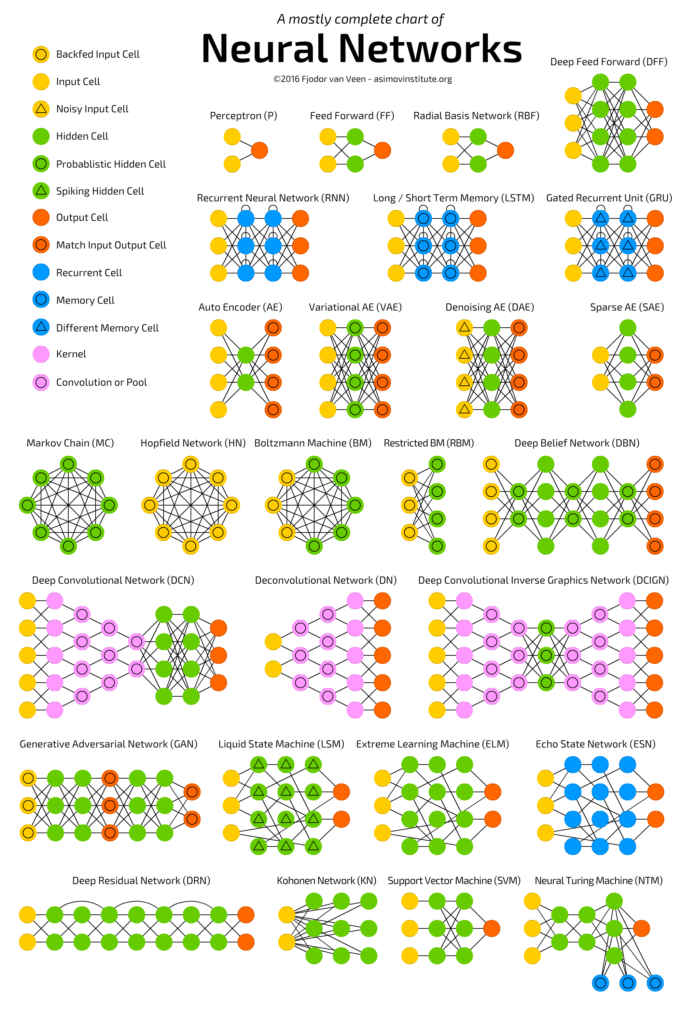

Fonte: https://www.deeplearningbook.com.br/o-perceptron-parte-1/